In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [145]:
df = pd.read_csv('tmdb_movies.csv')
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [146]:
df.shape

(10866, 21)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

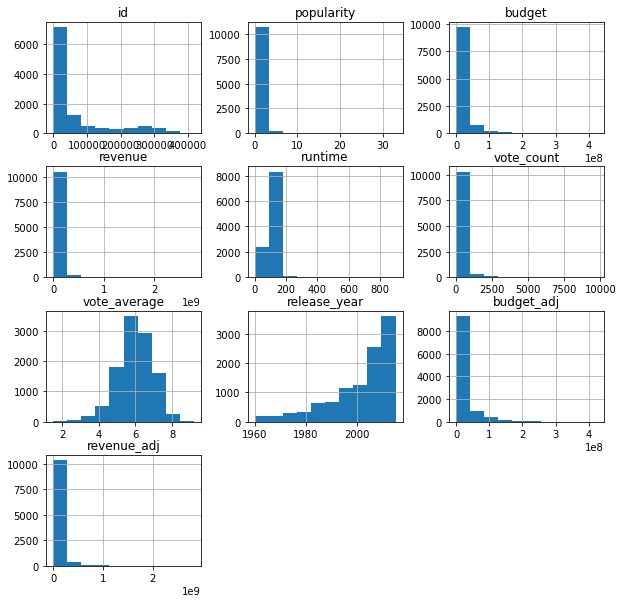

In [148]:
df.hist(figsize = (10, 10));

In [149]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


# Data cleaning: 
1. budgets equal zero: to be deleted
2. duplicated entries: to be deleted
3. revenues equal zero: to be deleted
4. columns including:'imdb_id', 'homepage', 'tagline', 'keywords','production_companies','overview', 'release_date' are not useful for analysis: to be dropped
5.Outliers of low budget were moved considering about the data entry mistakes.

In [150]:
df_sub = df[df.budget >= 1.000000e+06]

In [151]:
sum(df_sub.duplicated())

1

In [152]:
df_sub.drop_duplicates(inplace = True)

/opt/anaconda3/envs/tea_facts/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [153]:
df_sub = df_sub[df_sub.revenue != 0]

In [154]:
df_sub.drop(['id', 'homepage', 'tagline', 'keywords','production_companies','overview', 'release_date'], axis = 1, inplace = True)

In [155]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3715 entries, 0 to 10848
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   imdb_id         3715 non-null   object 
 1   popularity      3715 non-null   float64
 2   budget          3715 non-null   int64  
 3   revenue         3715 non-null   int64  
 4   original_title  3715 non-null   object 
 5   cast            3712 non-null   object 
 6   director        3714 non-null   object 
 7   runtime         3715 non-null   int64  
 8   genres          3715 non-null   object 
 9   vote_count      3715 non-null   int64  
 10  vote_average    3715 non-null   float64
 11  release_year    3715 non-null   int64  
 12  budget_adj      3715 non-null   float64
 13  revenue_adj     3715 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 435.4+ KB


In [156]:
df_sub.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3715.000000,3.715000e+03,3.715000e+03,3715.000000,3715.000000,3715.000000,3715.000000,3.715000e+03,3.715000e+03
mean,1.217600,3.858236e+07,1.112443e+08,109.704172,542.531359,6.165653,2001.369044,4.586800e+07,1.410877e+08
std,1.493993,4.237324e+07,1.787215e+08,19.819989,892.124593,0.793141,11.149701,4.482706e+07,2.185358e+08
min,0.010335,1.000000e+06,2.000000e+00,26.000000,10.000000,2.200000,1960.000000,9.199996e+05,2.370705e+00
25%,0.475797,1.100000e+07,1.533689e+07,96.000000,75.000000,5.700000,1996.000000,1.455379e+07,2.050987e+07
50%,0.822890,2.500000e+07,4.806344e+07,106.000000,213.000000,6.200000,2004.000000,3.141727e+07,6.505889e+07
75%,1.407334,5.000000e+07,1.291124e+08,120.000000,592.000000,6.700000,2010.000000,6.216097e+07,1.679167e+08
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


# Question1: Which attributes correlate revenue more?

In [157]:
df_sub.corr()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,1.000000,0.440355,0.612456,0.209309,0.778275,0.324589,0.179442,0.391290,0.543396
budget,0.440355,1.000000,0.684896,0.249036,0.552699,0.027886,0.271609,0.957351,0.528571
revenue,0.612456,0.684896,1.000000,0.244413,0.752871,0.234459,0.140593,0.653510,0.900730
runtime,0.209309,0.249036,0.244413,1.000000,0.270444,0.371272,-0.122566,0.323470,0.276221
vote_count,0.778275,0.552699,0.752871,0.270444,1.000000,0.395458,0.212398,0.492597,0.652729
vote_average,0.324589,0.027886,0.234459,0.371272,0.395458,1.000000,-0.130953,0.041306,0.273731
release_year,0.179442,0.271609,0.140593,-0.122566,0.212398,-0.130953,1.000000,0.069807,-0.104846
budget_adj,0.391290,0.957351,0.653510,0.323470,0.492597,0.041306,0.069807,1.000000,0.566328
revenue_adj,0.543396,0.528571,0.900730,0.276221,0.652729,0.273731,-0.104846,0.566328,1.000000


#Answer to question 1: From the analysis above, popularity and budget correlates with revenue more obviously than other variables.

# Question2: What is the lowest and highest year revenue?

In [158]:
df_sub.groupby(df.release_year)['revenue'].sum().max()

26134412841

In [159]:
df_sub.groupby(df.release_year)['revenue'].sum().min()

84736689

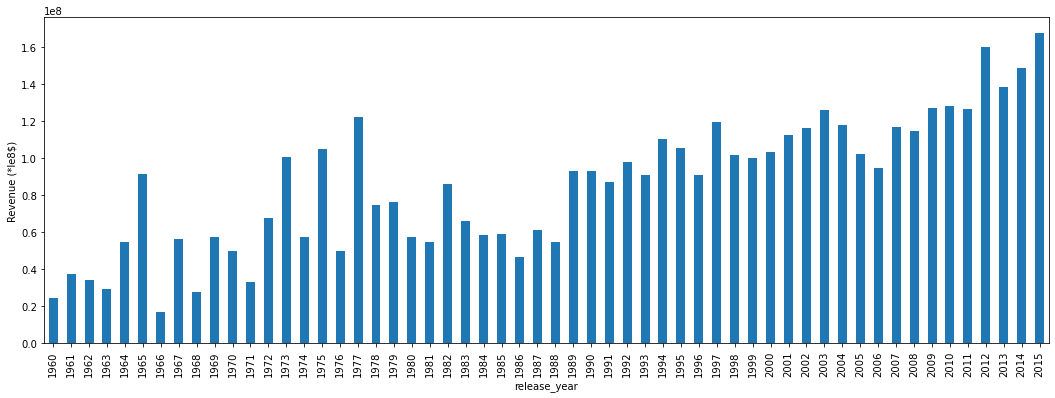

In [160]:
plt.figure(figsize = [18,6])
df_sub.groupby(['release_year']).revenue.mean().plot(kind = 'bar')
plt.ylabel('Revenue (*le8$)');

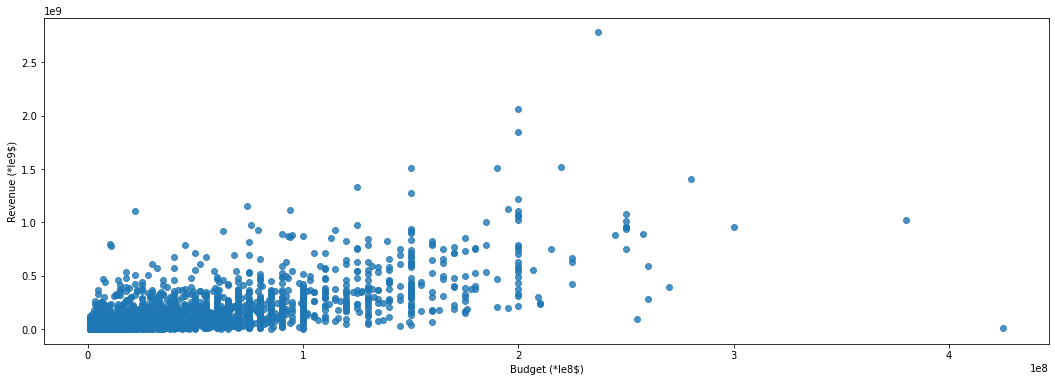

In [161]:
plt.figure(figsize = [18,6])
sb.regplot(data= df_sub, x = 'budget', y = 'revenue', fit_reg = False)
tick_locs = []
plt.xlabel('Budget (*le8$)')
plt.ylabel('Revenue (*le9$)');

In [162]:
df_sub['genres'] = df_sub['genres'].apply(lambda x: str(x).split('|')[0])

In [163]:
df_sub['genres'].unique()

array(['Action', 'Adventure', 'Western', 'Science Fiction', 'Drama',
       'Family', 'Comedy', 'Crime', 'Romance', 'War', 'Thriller',
       'Fantasy', 'History', 'Mystery', 'Animation', 'Horror', 'Music',
       'Documentary', 'TV Movie'], dtype=object)

In [164]:
df_sub.head(3)

,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,5562,6.5,2015,1.379999e+08,1.392446e+09
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,6185,7.1,2015,1.379999e+08,3.481613e+08
2,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure,2480,6.3,2015,1.012000e+08,2.716190e+08


In [165]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3715 entries, 0 to 10848
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   imdb_id         3715 non-null   object 
 1   popularity      3715 non-null   float64
 2   budget          3715 non-null   int64  
 3   revenue         3715 non-null   int64  
 4   original_title  3715 non-null   object 
 5   cast            3712 non-null   object 
 6   director        3714 non-null   object 
 7   runtime         3715 non-null   int64  
 8   genres          3715 non-null   object 
 9   vote_count      3715 non-null   int64  
 10  vote_average    3715 non-null   float64
 11  release_year    3715 non-null   int64  
 12  budget_adj      3715 non-null   float64
 13  revenue_adj     3715 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 435.4+ KB


# Question3: which kind of genre brought the highest revenue?

In [166]:
df_sub.groupby('genres').mean()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
genres,,,,,,,,,
Action,1.452175,5.235228e+07,1.375060e+08,110.588840,730.535977,5.996769,2000.825257,6.177049e+07,1.645307e+08
Adventure,1.912785,7.325103e+07,2.310716e+08,115.190323,991.522581,6.242581,1998.987097,8.726171e+07,3.063096e+08
Animation,1.712723,8.001165e+07,2.761320e+08,90.233010,917.912621,6.361165,2005.067961,8.541191e+07,2.959841e+08
Comedy,0.937122,2.734910e+07,8.190960e+07,102.403183,333.037135,6.015385,2001.889920,3.238644e+07,1.039922e+08
Crime,1.085425,2.671280e+07,7.280938e+07,115.337349,453.024096,6.451807,1999.481928,3.269828e+07,9.826339e+07
Documentary,0.327082,5.879914e+06,2.660013e+07,101.333333,66.083333,6.625000,2005.416667,6.464999e+06,2.901356e+07
Drama,0.953327,2.598283e+07,6.800022e+07,118.744076,394.163507,6.438744,2002.133886,3.251440e+07,9.528239e+07
Family,1.609295,6.037500e+07,2.175372e+08,93.475000,667.800000,6.100000,2002.225000,6.744876e+07,2.728411e+08
Fantasy,1.601478,5.644491e+07,1.625490e+08,104.685185,711.592593,6.087963,2000.712963,6.523692e+07,1.979280e+08


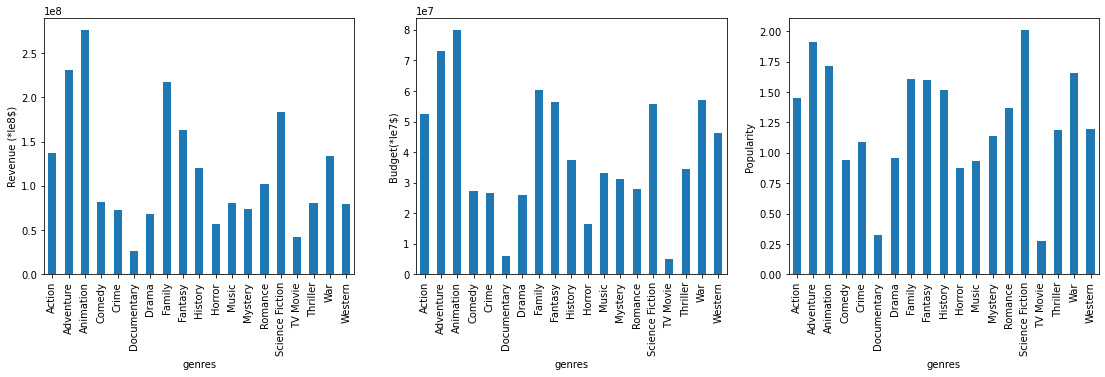

In [167]:
def cm_to_inch(value):
    return value/2.54

plt.figure(figsize = (cm_to_inch(48), cm_to_inch(12)))
plt.subplot(1,3,1)
df_sub.groupby('genres').revenue.mean().plot(kind = 'bar')
plt.ylabel('Revenue (*le8$)')
plt.subplot(1,3,2)
df_sub.groupby('genres').budget.mean().plot(kind = 'bar')
plt.ylabel('Budget(*le7$)')
plt.subplot(1,3,3)
df_sub.groupby('genres').popularity.mean().plot(kind = 'bar')
plt.ylabel('Popularity');

Animation brought the highest revenue, and got the highest budget. Science Fiction is the type with the hight popularity.

# Question 4: What was the trend regarding to the genres of movies release over time?

Text(0.5, 1.0, 'Trend of the Genres of Movies Released Between the Year 1960 to 2015')

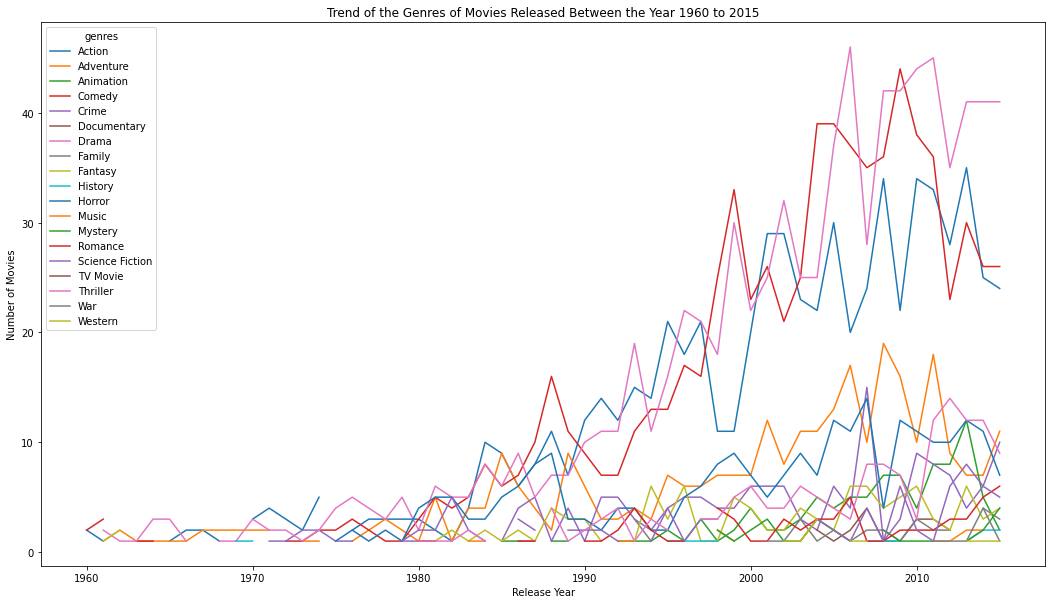

In [168]:
df_sub.groupby(['release_year', 'genres']).count()['imdb_id'].unstack().plot(figsize = (18,10))
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Trend of the Genres of Movies Released Between the Year 1960 to 2015')

Over the years between 1960 to 2015, more and more Action, Drama and Comedy movies released.

# Question 5: What were the gross profits of movies by genres?

In [169]:
df_sub['profit'] = df['revenue'] / df['budget']

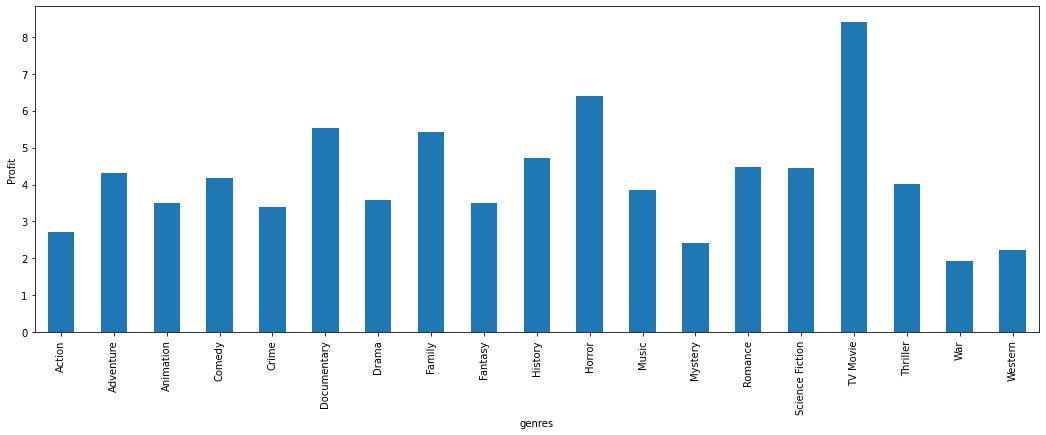

In [170]:
plt.figure(figsize = [18,6])
df_sub.groupby('genres').profit.mean().plot(kind = 'bar')
plt.ylabel('Profit');

TV movie brought the highest profit compared with other genres.

Project summary: The original data contains duplicated rows and irrelevent columns for analysis such as 'imdb_id', 'homepage', 'tagline', 'keywords','production_companies','overview', 'release_date' are not useful for analysis: to be dropped. These columns and rows were removed. In addition, the entries in which the budget value or revenues equal zero are misleading for analysis, and therefore, together with the outlier entries, all were removed. Then, 3715 entries were selected for analysis. 
Correlation among each numerical variables demonstrated that popularity and budget correlate deeper with revenues since the correlation rates were close to value 1 compared with other variables.
Further analysis through calculation and visualization showed that the year had the highest year revenue was 2015, followed by 2012 while the lowest was 1966. The reason can be revealed by revisiting the situations and movie market analysis can be done further. Furthermore, animation movies brought the highest revenue but also with the highest budget. Among all, science fiction is the most popular movie genre. Over the time, action, drama and comedy movies have been released increasingly, specifically since the middle of the1980s. Beyond those, TV movies created the highest profit among all genres.